In [1]:
# source "C:/Users/leand/venvs/pns/Scripts/activate"
# python -m ipykernel install --user --name=pns --display-name "pns"

import os
import pandas as pd
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
from tqdm import tqdm

# Módulos de interesse

- Modulo A, B e D: Contêm informações sociodemográficas
- Modulo L: Crianças com menos de 2 anos
- Módulo R: Saúde da Mulher
- Modulo S: Pré-natal
- Modulo W: Antropometria
- Módulo E: Trabalho para maiores de 14 anos


# Analise de Dados

In [2]:
modulo_identificacao = [
    # Módulo de Identificacao
    "V0001",  # Unidade da Federação
    "V0024", # Estrato
    "UPA_PNS", # UPA
    "V0006_PNS", # Número ordem domicilio PNS
    "C00301", # Número ordem do morador
    "V0015", # Tipo da Entrevista
    "V0022", # Quantidade de moradores
    "V0026",  # Tipo de situação censitária
    "V0031", # Tipo de área Capital, Metropolitana
    "V0025A", # Seleção do morador de 15 anos ou mais para responder o questionário individual
    "V0025B", # Seleção do morador de 15 anos ou mais para ter medida antropométrica aferida
    "V0029", # Peso amostral do morador sem calibração
    "V00291", # Peso amostral do morador com calibração
    "V00282", #		Projeção da população
    "V00283", #	Domínio de projeção para domicílio e moradores
    "V00293", # Domínio de projeção para morador selecionado
    "V00303", # Domínio de projeção para morador selecionado para antropometria
    ]
modulo_C = [
    # Módulo C - Caracteristicas gerais dos moradores
    "C001", # Quantidade de pessoas no domicilio
    "C006",  # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",  # Idade do morador na data de referência
    "C009",  # Cor ou Raça
]
modulo_D = [
    # Módulo D - Cartacterisiticas de Educação dos Moradores
    "D00201",  # Frequenta escola ou creche
    "D00901",  # Qual foi o curso mais elevado que ___frequentou
]
modulo_E = [
    # Módulo E - Características de Trabalho
    "E01602",  # Qual era o rendimento bruto mensal ou retirada que ___ fazia normalmente nesse trabalho?(valor em dinheiro)
    "E017", # Quantas horas ___ trabalhava normalmente, por semana, nesse trabalho?
]
modulo_G = [
    # Módulo G - Deficiecias maiores de 2 anos
    "G033",  # ___ usa óculos ou outro aparelho de auxílio para lidar com problemas de visão? 
    "G047",  #  ___ tem dificuldade permanente de enxergar? 
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G049",  # ____________ faz uso de aparelho auditivo
    "G051",  # ____________ faz uso de implante coclear?
    "G053",  # ____________ faz uso de sistema de frequência modulada individual (sistema FM)?
    "G059",  # ___ usa algum aparelho de auxílio para se locomover?
    "G060",  # ____________ faz uso de cadeira de rodas?
    "G062",  # ____________ faz uso de bengala, muletas ou andador?
    "G064",  # ____________ faz uso de prótese?
    "G066",  # ____________ faz uso de órtese?
    "G070",  # ___ tem dificuldade permanente de caminhar ou subir degraus, mesmo usando prótese, bengala ou outro aparelho de auxílio? (Para moradores com 5 anos ou mais de idade.) OU Comparado com crianças da mesma idade, ___ tem dificuldade permanente para caminhar, mesmo usando prótese, bengala ou aparelho de auxílio? (Para moradores com 2 a 4 anos de idade.)
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
]

modulo_J =  [
    # Utilização de Serviços de saude
    'J001', # estado de saude
    'J007', # doença cronica
    'J012', # Quantidade de consultas médicas no ultimos 12 meses
    "J00402", #  Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas
]

modulo_L = [
    # Módulo L - Crianças com menos de dois anos
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso? 
    "L021",  # Foi realizado o teste do pezinho?
    "L033",  # O teste do coraçãozinho realizado deu resultado alterado?
    "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
    "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
    "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
    "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
    "L01701",  # Leite materno?
    "L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso?
]
modulo_P = [
    # Módulo P - Estilos de Vida
    "P00103",  # Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
    "P00104",  # Peso - Final (em kg) (3 inteiros e 1 casa decimal)
    "P00403",  # Altura - Informada (em cm) (3 inteiros)
    "P00404",  # Altura - Final (em cm) (3 inteiros)
    "P027",    # Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?
    "P035",    # Quantos dias por semana o(a) Sr(a) costuma  (costumava)praticar exercício físico ou esporte?
    "P050", # Atualmente, o(a) Sr(a) fuma algum produto do tabaco?
    "P052", # E no passado, o(a) Sr(a) fumou algum produto do tabaco?
]
modulo_Q = [
    # Módulo Q - Doenças crônicas
    "Q00201",  # Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
    "Q00202",  # Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?
    "Q003",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?
    "Q028",  # Em geral, em que grau a hipertensão ou alguma complicação da hipertensão limita as suas atividades habituais (como trabalhar, estudar, realizar afazeres domésticos etc.)?
    "Q03001",  # Algum médico já lhe deu o diagnóstico de diabetes?
    "Q03002",  # Esse diabetes ocorreu apenas durante algum período de gravidez?
    "Q031",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?
    "Q055011",  # Problemas na vista
    "Q055012",  # Infarto ou AVC (Acidente Vascular cerebral) /derrame ou outro problema circulatório
    "Q055013",  # Problema nos rins
    "Q060",  # Algum médico já lhe deu o diagnóstico de colesterol alto?
    "Q061",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?
    "Q06306", # um médico já lhe deu o diagnóstico de uma doença do coração, tal como infarto, angina, insuficiência cardíaca ou outra?
    "Q06307",  # Infarto
    "Q06308",  # Angina
    "Q06309",  # Insuficiência cardíaca
    "Q06310",  # Arritmia
    "Q064",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?
    "Q068",  # Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?
    "Q070",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?
    "Q074",  # Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?
    "Q075",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?
    "Q079",  # Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?
    "Q080",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?
    "Q084",  # O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço, lombalgia, dor ciática, problemas nas vértebras ou disco?
    "Q085",  # Que idade o(a) Sr(a) tinha quando começou o problema na coluna?
    "Q087",  # Em geral, em que grau o problema na coluna limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q088",  # Algum médico já lhe deu o diagnóstico de DORT?
    "Q08901",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?
    "Q091",  # Em geral, em que grau o DORT limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?
    "Q092",  # Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
    "Q09301",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?
    "Q109",  # Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q11006", #Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?
    "Q11007",  # Diagnóstico de Esquizofrenia
    "Q11008",  # Diagnóstico de Transtorno bipolar
    "Q11009",  # Diagnóstico de TOC (Transtorno obsessivo compulsivo)
    "Q111",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q11604",  # Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?
    "Q11605",  # Diagnóstico de enfisema pulmonar
    "Q11606",  # Diagnóstico de bronquite crônica
    "Q11701",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?
    "Q120",  # Algum médico já lhe deu diagnóstico de câncer?
    "Q12201",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q124",  # Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
    "Q125",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?
    "Q128", # Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)?
]
modulo_R = [
    # Módculo R - Saúde da Mulher - 15 anos ou mais
    "R011", # Segundo o médico, qual o motivo da retirada do útero?
    "R025",  # Com que idade a sra ficou menstruada pela primeira vez?
    "R026",  # A sra ainda fica menstruada?
    "R027",  # Com que idade a sra parou de menstruar?
    "R028",  # A sra já entrou na menopausa?
    "R029",  # Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa (com comprimidos, adesivos, gel ou injeções)?
    "R034",  # A sra usa algum método para evitar a gravidez atualmente?
    "R035",  # Qual o principal motivo de não evitar a gravidez?
    "R03601",  # Pilula?
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
]
modulo_S = [
    # Módulo S - Atendimento pré-natal e parto - 15 anos ou mais
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S06703",  # Em que data foi o último parto? ANO
    "S068",  # Quando estava grávida fez alguma consulta de pré-natal?
    "S06901",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S06902",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S070",  # Quantas consultas de pré-natal fez durante esta gravidez?
    "S080",  # Durante o pré-natal de ______, foi realizado teste/exame para sífilis?
    "S082",  # Qual foi o resultado do teste/exame para sífilis?
    "S083",  # Recebeu tratamento para sífilis?
    "S086",  # Qual foi o resultado do teste/exame para sífilis do seu parceiro?
    "S087",  # O seu parceiro foi tratado?
    "S095",  # Durante o pré-natal a Sra foi orientada a usar preservativo?
    "S096",  # Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?
    "S098",  # Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano (mal dos sete dias) – dT ou dTpa?
    "S099",  # Quantas doses dessa injeção tomou durante esta gravidez?
    "S09901",  # Número de doses
    "S110",  # Qual foi o peso dele(a) ao nascer?
    "S11001",  # Peso ao nascer (em quilogramas)
    "S112",  # Onde foi realizado o parto?
    "S115",  # Qual foi o tipo de parto?
    "S116",  # Nesta gravidez, entrou em trabalho de parto?
    "S117",  # Qual o principal motivo de ter tido parto cesáreo?
    "S118",  # Quantas semanas de gravidez tinha no momento do parto?
    "S11801",  # Quantidade de semanas
    "S125",  # Teve alguma complicação durante o parto?
    "S126",  # Você teve alguma complicação após o parto?
    "S127",  # Por causa dessa complicação precisou ser internada?
    "S130",  # Durante a primeira hora após o nascimento, seu(sua) filho(a) foi colocado(a) em contato com você pele a pele?
    "S131",  # Depois do nascimento, ele(a) ficou com você no quarto até a alta hospitalar?
    "S132",  # Seu(sua) filho(a) saiu do hospital junto com você?
    "S133",  # A criança não saiu do hospital junto com você porque:
    "S134",  # Você fez consulta de puerpério (consulta com médico ou enfermeiro até 42 dias após o parto)?
    "S136",  # Durante os primeiros três meses após o parto, você tomou medicamento contendo somente ferro ou ferro com vitaminas?
]

modulo_T = [
    # Módulo de DST
    "T004", #Nos últimos 12 meses, algum médico lhe deu diagnóstico de doença/infecção sexualmente transmissível?

]
modulo_W = [
    # Módulo W - Antropometria
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
    "VDL001",  # Idade em meses das crianças nascidas no período de referência do Módulo L
]

modulo_derivadas = [
    "VDE014", #Grupamentos de atividade do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade
    "VDF004", # Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do
]

In [3]:
colunas_interesse = modulo_identificacao + modulo_C + modulo_D + modulo_E + modulo_G + modulo_J + modulo_L + modulo_P + modulo_Q + modulo_R + modulo_S + modulo_T + modulo_W + modulo_derivadas

In [4]:

dataframes = []

for i in tqdm(range(21)):  # Arquivos de 0 a 20
    df = pd.read_csv(f"https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/main/data/pns2019_{i}.csv", usecols=colunas_interesse)
    #df = pd.read_csv(f"pns2019_{i}.csv")
    dataframes.append(df)
# Armazenar em um unico Dataframe
pns_2019 = pd.concat(dataframes, ignore_index=True)
pns_2019.info(show_counts=True, verbose=True)

100%|██████████| 21/21 [01:03<00:00,  3.04s/it]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 169 columns):
 #    Column     Non-Null Count   Dtype  
---   ------     --------------   -----  
 0    V0001      293726 non-null  int64  
 1    V0024      293726 non-null  int64  
 2    UPA_PNS    293726 non-null  int64  
 3    V0006_PNS  293726 non-null  int64  
 4    V0015      293726 non-null  int64  
 5    V0022      279382 non-null  float64
 6    V0026      293726 non-null  int64  
 7    V0031      293726 non-null  int64  
 8    V0025A     279382 non-null  float64
 9    V0025B     20712 non-null   float64
 10   C001       279382 non-null  float64
 11   C00301     279382 non-null  float64
 12   C006       279382 non-null  float64
 13   C00701     279382 non-null  float64
 14   C00702     279382 non-null  float64
 15   C00703     279382 non-null  float64
 16   C008       279382 non-null  float64
 17   C009       279382 non-null  float64
 18   D00201     279382 non-null  float64
 19   

In [5]:
pns_2019['chave_domicio'] = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str)
pns_2019['chave_pessoa']  = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str) + '_' + pns_2019['C00301'].astype(str)
pns_2019['peso_morador_selec'] = pns_2019['V00291']*(94114 / 168426190)

In [6]:
df = pns_2019.copy()
# Dicionário para renomear as colunas
rename_columns = {
    "V0001": "UF",
    "V0024":"Estrato",
    "UPA_PNS":"UPA",
    "V0006_PNS":"N_ordem_domicilio_PNS",
    "C00301":"N_ordem_morador",
    "C001":"N_pessoas_domicilio",
    "V0022":"Quantidade_moradores",
    "V0015":'tipo_entrevista',
    "V0026": "regiao_metropolitana",
    "V0031": "capital_metropolitana",
    "C006": "sexo",
    "C00701": "dia_nascimento",
    "C00702": "mes_nascimento",
    "C00703": "ano_nascimento",
    "C008": "idade",
    "P00103": "peso_info_kg",
    "P00104": "peso_final_kg",
    "P00403": "altura_info_cm",
    "P00404": "altura_final_cm",
    "W001": "antropometria_aferida_morador",
    "W00101": "peso_1_pesagem_kg",
    "W00102": "peso_2_pesagem_kg",
    "W00103": "peso_final_medido_kg",
    "W00201": "altura_1_medicao_cm",
    "W00202": "altura_2_medicao_cm",
    "W00203": "altura_final_medida_cm",
}

# Renomear as colunas no DataFrame
# df.rename(columns=rename_columns, inplace=True)

# Iterar sobre as colunas do dicionário e criar novas colunas
for original_col, new_col in rename_columns.items():
    if original_col in df.columns:  # Verificar se a coluna original existe no DataFrame
        df[new_col] = df[original_col]  # Criar a nova coluna com os mesmos valores da original


In [7]:
# Preencher a coluna de estado
estados = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal",
}

df['UF_sigla'] = df['UF'].map(estados)

# Mapeamento direto de estados para suas macroregiões
estado_para_regiao = {
    "Rondônia": "Norte",
    "Acre": "Norte",
    "Amazonas": "Norte",
    "Roraima": "Norte",
    "Pará": "Norte",
    "Amapá": "Norte",
    "Tocantins": "Norte",
    "Maranhão": "Nordeste",
    "Piauí": "Nordeste",
    "Ceará": "Nordeste",
    "Rio Grande do Norte": "Nordeste",
    "Paraíba": "Nordeste",
    "Pernambuco": "Nordeste",
    "Alagoas": "Nordeste",
    "Sergipe": "Nordeste",
    "Bahia": "Nordeste",
    "Minas Gerais": "Sudeste",
    "Espírito Santo": "Sudeste",
    "Rio de Janeiro": "Sudeste",
    "São Paulo": "Sudeste",
    "Paraná": "Sul",
    "Santa Catarina": "Sul",
    "Rio Grande do Sul": "Sul",
    "Mato Grosso do Sul": "Centro-Oeste",
    "Mato Grosso": "Centro-Oeste",
    "Goiás": "Centro-Oeste",
    "Distrito Federal": "Centro-Oeste",
}

# Adicionar a coluna 'regiao_brasileira' ao DataFrame
df['regiao_brasileira'] = df['UF_sigla'].map(estado_para_regiao)

#Mapear região
regiao = {
    1: "Urbano",
    2: "Rural",
}
df['regiao_metropolitana'] = df['regiao_metropolitana'].map(regiao)

# Dicionário de mapeamento
regioes_map = {
    1: "Capital",
    2: "Região Metropolitana, excluindo a capital",
    3: "RIDE, excluindo a capital",
    4: "Interior"
}
df['capital_metropolitana'] = df['capital_metropolitana'].map(regioes_map)

# Dicionário de Sexo
sexo = {
    1: "Masculino",
    2: "Feminino"
}
df['sexo'] = df['sexo'].map(sexo)

# Pesquisa realizada
status_domicilios = {
    1: "Realizada",
    2: "Domicílio Fechado",
    3: "Recusa",
    4: "Outro Motivo",
    5: "Domicílio Vago",
    6: "Domicílio de uso ocasional",
    7: "Domicílio coletivo ou improvisado",
    8: "Domicílio em obras ou em ruínas",
    9: "Domicílio demolido",
    10: "Domicílio não encontrado",
    11: "Unidade não residencial",
    12: "Domicílio fora do setor",
}
df['tipo_entrevista'] = df['tipo_entrevista'].map(status_domicilios)

# Dicionário de mapeamento
map_raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
    # Se houver um código específico p/ "Não aplicável", inclua-o aqui
    # Exemplo: 99: 'Não aplicável'
}


df['raca'] = df['C009'].map(map_raca)

In [8]:
df.shape, df.drop_duplicates().shape

((293726, 201), (293726, 201))

In [9]:
cols = df.columns
for col in cols:
  print(df[col].value_counts(dropna=False))
  print('\n\n')

V0001
35    18504
21    17912
31    15421
23    15281
33    14776
15    14393
13    13074
26    12381
41    11694
29    11061
32    10673
42    10607
27    10474
43    10369
25    10094
24     9964
22     9044
50     8766
52     8506
14     8476
12     8270
28     8140
53     7609
51     7607
11     7391
16     6640
17     6599
Name: count, dtype: int64



V0024
1210010    3691
1410011    3138
2710111    2720
2410011    2569
1250020    2484
           ... 
3220020      61
4230020      54
3321020      54
4220020      47
3532020      45
Name: count, Length: 574, dtype: int64



UPA_PNS
130033536    94
160007292    93
140004603    88
140008399    87
140002449    86
             ..
350286470    14
410182027    14
270018200    14
210092069    13
230030392    12
Name: count, Length: 8031, dtype: int64



V0006_PNS
2     21905
7     21764
11    21746
1     21743
12    21723
10    21707
3     21643
6     21587
9     21552
5     21525
8     21503
4     21208
13    10242
15    10228
14    10099


# Dados não informados na pesquisa

5% - 16342 não informaram Data de nascimento

67,8% sem informação de peso e Altura

Sessão W - 2,5% dos entrevistados foram Aferidos

# Limpeza

- Somente entrevistas realizadas
- Informações de Idade


In [10]:
print('Antes:', df.shape)
# Entrevistas realizadas
df = df[df['tipo_entrevista']=='Realizada'].reset_index(drop=True)
print('Depois:', df.shape)

Antes: (293726, 201)
Depois: (279382, 201)


In [11]:
print('Antes:', df.shape)
# Idade Informada
df = df[~df['idade'].isna()].reset_index(drop=True)
print('Depois:', df.shape)

Antes: (279382, 201)
Depois: (279382, 201)


# Criação de novas Features

## Ano Nascimento Inferido pela idade

In [12]:
df['ano_nascimento_inferido'] = np.where(df['ano_nascimento']==9999, 2019 - df['idade'], df['ano_nascimento'])

## IMC

In [13]:
# Calcular o IMC
# Função para calcular o IMC
def calcular_imc(row):
    """
    Calcula o IMC com base no peso (kg) e altura (cm).
    :param row: Linha do DataFrame.
    :return: Valor do IMC (float) ou None se peso ou altura forem nulos.
    """
    if pd.notnull(row['peso']) and pd.notnull(row['altura']) and row['altura'] > 0:
        altura_metros = row['altura'] / 100  # Converter altura de cm para metros
        return row['peso'] / (altura_metros ** 2)
    return None

# Função para classificar o IMC
def classificar_imc(imc):
    if pd.isnull(imc):
        return None, None
    elif imc < 18.5:
        return "Magreza", 0
    elif 18.5 <= imc < 25:
        return "Normal", 0
    elif 25.0 <= imc < 30:
        return "Sobrepeso", 1
    elif 30.0 <= imc < 40:
        return "Obesidade", 2
    elif imc >= 40.0:
        return "Obesidade Grave", 3
    return None, None


In [14]:
# Peso unico, usar medido, ou informado
df['peso'] = np.where(df['peso_final_kg'].isna(), df['peso_info_kg'], df['peso_final_kg'])
# Peso Altura, usar medido, ou informado
df['altura'] = np.where(df['altura_final_cm'].isna(), df['altura_info_cm'], df['altura_final_cm'])

# Aplicar a função ao DataFrame
df['imc'] = df.apply(calcular_imc, axis=1)

# Aplicar a função e criar as colunas 'imc_classificacao' e 'imc_grau_obesidade'
df[['imc_classificacao', 'imc_grau_obesidade']] = df['imc'].apply(
    lambda x: pd.Series(classificar_imc(x))
)

## Escolaridade

    D00901 - agrupar
    Escolaridade
        ○ Fundamental
        ○ Medio
        ○ Superior
        ○ Pós Graduação

In [15]:
nivel_educacao_agrupado = {
    1: "Fundamental",  # Creche
    2: "Fundamental",  # Pré-escola
    3: "Fundamental",  # Classe de alfabetização – CA
    4: "Fundamental",  # Alfabetização de jovens e adultos
    5: "Fundamental",  # Antigo primário (elementar)
    6: "Fundamental",  # Antigo ginasial (médio 1º ciclo)
    7: "Fundamental",  # Regular do ensino fundamental ou do 1º grau
    8: "Fundamental",  # Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental
    9: "Médio",        # Antigo científico, clássico etc. (médio 2º ciclo)
    10: "Médio",       # Regular do ensino médio ou do 2º grau
    11: "Médio",       # Educação de jovens e adultos (EJA) ou supletivo do ensino médio
    12: "Superior",    # Superior – graduação
    13: "Pós-graduação",  # Especialização de nível superior (duração mínima de 360 horas)
    14: "Pós-graduação",  # Mestrado
    15: "Pós-graduação",  # Doutorado
    99: "Ignorado"     # Ignorado
}

df['escolaridade'] = df['D00901'].map(nivel_educacao_agrupado)
df['escolaridade'].value_counts(dropna=False)

escolaridade
NaN              101369
Fundamental       77300
Médio             68642
Superior          24223
Pós-graduação      7848
Name: count, dtype: int64

## Peso ao Nascer
        S11001
        Peso ao nascer
            ○ Baixo peso extremo 	< 1.500 g  ou 1,5 kg
            ○ Baixo peso	< 2.500g  ou 2,5 kg
            ○ Adequado	2.500 g – 3.999 g  ou 2,5 kg ou 3,999
            ○ Macrossomia 	≥ 4.000 g ou 4 kg

In [16]:
# Criar a coluna 'peso_ao_nascer' com base nos valores da coluna 'S11001'
def categorizar_peso_nascimento(peso):
    if pd.isna(peso):  # Tratar valores NaN
        return np.nan
    elif peso < 1500:
        return "Baixo peso extremo"
    elif peso < 2500:
        return "Baixo peso"
    elif 2500 <= peso < 4000:
        return "Adequado"
    elif peso >= 4000:
        return "Macrossomia"
    else:
        return np.nan  # Caso algum valor não se encaixe (opcional)

# Aplicar a função ao DataFrame
df["peso_ao_nascer"] = df["S11001"].apply(categorizar_peso_nascimento)

# Exibir as contagens de cada categoria
print(df["peso_ao_nascer"].value_counts(dropna=False))

peso_ao_nascer
NaN                   276736
Adequado                2206
Baixo peso               223
Macrossomia              185
Baixo peso extremo        32
Name: count, dtype: int64


## Prematuro
        S11801 - prematuro
        Classificação Idade Gestacional
             ○ Prematuro extremo	< 28 semanas
             ○ Prematuro moderado a grave: 28 a 31 semanas e 6 dias
             ○ Prematuro tardio: 32 a 36 semanas e 6 dias
             ○ A termo: 37 a 41 semanas e 6 dias
             ○ Pós-termo: ≥ 42 semanas


In [17]:
# Função para categorizar a idade gestacional
def categorizar_idade_gestacional(semanas):
    if pd.isna(semanas):  # Tratar valores NaN
        return np.nan
    elif semanas < 28:
        return "Prematuro extremo"
    elif 28 <= semanas <= 31:
        return "Prematuro moderado a grave"
    elif 32 <= semanas <= 36:
        return "Prematuro tardio"
    elif 37 <= semanas <= 41:
        return "A termo"
    elif semanas >= 42:
        return "Pós-termo"
    else:
        return np.nan  # Caso algum valor não se encaixe (opcional)

# Aplicar a função ao DataFrame
df["Classificação Idade Gestacional"] = df["S11801"].apply(categorizar_idade_gestacional)

# Exibir as contagens de cada categoria
print(df["Classificação Idade Gestacional"].value_counts(dropna=False))


Classificação Idade Gestacional
NaN                           276763
A termo                         2003
Prematuro tardio                 383
Pós-termo                        155
Prematuro extremo                 46
Prematuro moderado a grave        32
Name: count, dtype: int64


## Risco de Insulto Perinatal
            Risco de Insulto Perinatal - Boelano
            Considerar como sim as participantes com resposta Não (2) para os seguintes códigos quem tiver resposta 1. Seria classificado sem risco
            ○ S131
            ○ S132
            ○ S133 – Respostas 2 e 3 classificar como Risco sim

In [18]:
df['S131'].value_counts(dropna=False), df['S132'].value_counts(dropna=False), df['S133'].value_counts(dropna=False)

(S131
 NaN    276509
 1.0      2569
 2.0       304
 Name: count, dtype: int64,
 S132
 NaN    276509
 1.0      2689
 2.0       184
 Name: count, dtype: int64,
 S133
 NaN    279198
 3.0       108
 2.0        51
 4.0        16
 1.0         9
 Name: count, dtype: int64)

In [19]:
df['Risco de Insulto Perinatal'] = np.where((df['S131']==2) | (df['S132']==2) | (df['S133']==2) | (df['S133']==3) , 'Sim', 'Não')
df['Risco de Insulto Perinatal'].value_counts(dropna=False)

Risco de Insulto Perinatal
Não    279045
Sim       337
Name: count, dtype: int64

## Complicações perinatais

    Complicações Perinatais - bolean - Sim para qualquer uma
        ○ Q00202
        ○ Q03002
        ○ R011 ---
        ○ T004
        ○ S082
        ○ S125


In [20]:
df['Complicações Perinatais'] = np.where(
    df[['Q00202', 'Q03002', 'T004', 'S082', 'S125']].isin([1]).any(axis=1),
    'Sim', 'Não'
)
df['Complicações Perinatais'].value_counts(dropna=False)

Complicações Perinatais
Não    277063
Sim      2319
Name: count, dtype: int64

## Comorbidades
    Comorbidade
        ○ Q00201
        ○ Q03001
        ○ Q11604
        ○ Q11006
        ○ Q092
        ○ Q120
        ○ T004
        ○ Q055012
        ○ IMC Sobrepeso/Obeso
        ○ Q06306
        ○ Q060
        ○ J00402
        ○ Q124
        ○ Q128

In [21]:
df['fumante_atual'] = df['P050'].map({1:1, 2:1})

In [22]:
df['comorbidade'] = np.where(
    df[['Q00201', 'Q03001', 'Q11604', 'Q11006', 'Q092', 'Q120',
        'T004', 'Q055012', 'Q06306', 'Q060', 'Q124', 'Q128', 'fumante_atual']].isin([1]).any(axis=1),
    'Sim', 'Não'
)

# Criar a coluna 'comorbidade_score' contando quantas colunas possuem o valor 1
df['comorbidade_score'] = df[['Q00201', 'Q03001', 'Q11604', 'Q11006', 'Q092', 'Q120',
                              'T004', 'Q055012', 'Q06306', 'Q060', 'Q124', 'Q128',  'fumante_atual']].eq(1).sum(axis=1)

df['comorbidade'].value_counts(dropna=False), df['comorbidade_score'].value_counts(dropna=False)

(comorbidade
 Não    230136
 Sim     49246
 Name: count, dtype: int64,
 comorbidade_score
 0    230136
 1     26350
 2     13108
 3      6091
 4      2496
 5       857
 6       270
 7        59
 8        13
 9         2
 Name: count, dtype: int64)

## Renda

In [23]:
salario_minimo = 998.0

# Definição dos pontos de corte (bins), em reais
bins = [
    0,
    1*salario_minimo,
    2*salario_minimo,
    3*salario_minimo,
    5*salario_minimo,
    np.inf  # Limite superior aberto
]

# Rótulos correspondentes às faixas
labels = [
    "<1 SM",
    "1 a <2 SM",
    "2 a <3 SM",
    "3 a <5 SM",
    "≥5 SM"
]

df["faixa_renda"] = pd.cut(df["E01602"], bins=bins, labels=labels, right=False)
df["faixa_renda"].value_counts(dropna=False)


faixa_renda
NaN          158527
1 a <2 SM     52462
<1 SM         32118
2 a <3 SM     15330
3 a <5 SM     10910
≥5 SM         10035
Name: count, dtype: int64

In [24]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279382 entries, 0 to 279381
Data columns (total 216 columns):
 #    Column                           Non-Null Count   Dtype   
---   ------                           --------------   -----   
 0    V0001                            279382 non-null  int64   
 1    V0024                            279382 non-null  int64   
 2    UPA_PNS                          279382 non-null  int64   
 3    V0006_PNS                        279382 non-null  int64   
 4    V0015                            279382 non-null  int64   
 5    V0022                            279382 non-null  float64 
 6    V0026                            279382 non-null  int64   
 7    V0031                            279382 non-null  int64   
 8    V0025A                           279382 non-null  float64 
 9    V0025B                           20712 non-null   float64 
 10   C001                             279382 non-null  float64 
 11   C00301                           2793

# Clusterização

## Mães - Mulheres que tiveram filhos

- Usar as variáveis do Módulo S para identificar mulheres que tiveram Filhos (S066)
- Que informaram data de ultimo parto S06703
- Ver se o ultimo parto foi nos ultimos 6~7 anos. Para cruzar com o cluster de crianças e bater que elas de fato são mae e filha (aproximadamente)

In [25]:
pd.set_option('display.max_rows', 100)

In [26]:
# colunas_criadas = ['Quantidade_moradores', 'chave_domicio', 'chave_pessoa', 'UF_sigla', 'regiao_brasileira', 'regiao_metropolitana',  'sexo',
#                    'dia_nascimento', 'mes_nascimento', 'ano_nascimento', 'idade', 'peso', 'altura', 'imc', 'imc_classificacao', 'imc_grau_obesidade', 'ano_nascimento_inferido', 'peso_morador_selec']

# colunas_interesse = modulo_identificacao + colunas_criadas + modulo_C + modulo_D + modulo_G + modulo_P + modulo_Q + modulo_R + modulo_S + modulo_W

In [27]:
df.sexo.unique()

array(['Feminino', 'Masculino'], dtype=object)

In [28]:
# Guardar volumetrias para consulta futura
fil1 = (df.idade >= 15)
print(f'Quantidade de pessoas com 15 anos ou mais: {fil1.sum()}')

fil2 = (df.sexo=='Feminino')
print(f'Quantidade de mulheres: {fil2.sum()}')

fil3 = (df.S066>0) & (df.S066<99)
print(f'Quantidade de mulheres que tiveram 1 ou mais de 1 parto: {fil3.sum()}')

fil4 = (df.S06703>0) & (df.S06703 <9999)
print(f'Quantidade de mulheres que informaram a data do ultimo parto: {fil4.sum()}')

# fil5 = (df.S06703 >= 2011)
# print(f'Quantidade de mulheres que tiveram parto depois de 2011: {fil5.sum()}')

print(f'Quantidade de mulheres com 15 anos ou mais: {(fil1 & fil2).sum()}')
print(f'Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto: {(fil1 & fil2 & fil3).sum()}')
print(f'Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data: {(fil1 & fil2 & fil3 & fil4).sum()}')
print(f'Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data e o parto foi depois de 2011: {(fil1 & fil2 & fil3 & fil4).sum()}')

Quantidade de pessoas com 15 anos ou mais: 221095
Quantidade de mulheres: 144940
Quantidade de mulheres que tiveram 1 ou mais de 1 parto: 36481
Quantidade de mulheres que informaram a data do ultimo parto: 35869
Quantidade de mulheres com 15 anos ou mais: 116225
Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto: 36481
Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data: 35869
Quantidade de mulheres com 15 anos ou mais que tiveram mais de 1 parto e informaram data e o parto foi depois de 2011: 35869


In [29]:
df_maes = df[(fil1 & fil2 & fil3 & fil4)].copy().reset_index(drop=True)
df_maes.shape

(35869, 216)

## Flag de Parto em Idade avançada

In [30]:
df_maes.ano_nascimento.value_counts(dropna=False)

ano_nascimento
9999.0    1212
1979.0     774
1982.0     769
1977.0     763
1981.0     762
1983.0     759
1964.0     729
1976.0     721
1984.0     719
1970.0     707
1985.0     705
1980.0     704
1975.0     704
1962.0     702
1966.0     684
1973.0     683
1986.0     680
1967.0     680
1978.0     679
1965.0     675
1963.0     675
1972.0     670
1987.0     667
1960.0     665
1974.0     665
1969.0     646
1971.0     631
1959.0     629
1957.0     628
1988.0     628
1968.0     628
1961.0     593
1989.0     581
1956.0     577
1958.0     575
1955.0     568
1954.0     554
1953.0     542
1952.0     518
1950.0     517
1990.0     507
1991.0     454
1992.0     440
1993.0     433
1951.0     431
1949.0     421
1948.0     401
1994.0     387
1947.0     386
1995.0     366
1946.0     355
1944.0     348
1945.0     323
1996.0     310
1943.0     264
1997.0     258
1942.0     252
1940.0     242
1941.0     223
1998.0     218
1939.0     200
1938.0     193
1999.0     167
1936.0     148
1937.0     144
1935.0    

In [31]:
df_maes['idade_ultimo_parto'] = df_maes['S06703'] - df_maes['ano_nascimento_inferido']
df_maes['idade_ultimo_parto'].describe(percentiles=[0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99])

count    35869.000000
mean        29.141571
std          6.883644
min          8.000000
1%          16.000000
10%         21.000000
20%         23.000000
30%         25.000000
40%         27.000000
50%         29.000000
60%         30.000000
70%         33.000000
80%         35.000000
90%         38.000000
92%         39.000000
94%         40.000000
96%         42.000000
98%         44.000000
99%         46.000000
max         87.000000
Name: idade_ultimo_parto, dtype: float64

In [32]:
df_maes['parto_idade_avançada'] = np.where(df_maes['idade_ultimo_parto']>=35, 1, 0)

### Retirar maes muito novas ou muito velhas
- Outliers

In [33]:
df_maes = df_maes[df_maes['idade_ultimo_parto'] >= 15]
df_maes = df_maes[df_maes['idade_ultimo_parto'] <= 55]

In [34]:
df_maes['parto_idade_avançada'].value_counts(dropna=False)

parto_idade_avançada
0    27882
1     7814
Name: count, dtype: int64

In [35]:
df_maes['parto_idade_avançada'].value_counts(dropna=False, normalize=True)

parto_idade_avançada
0    0.781096
1    0.218904
Name: proportion, dtype: float64

<Axes: >

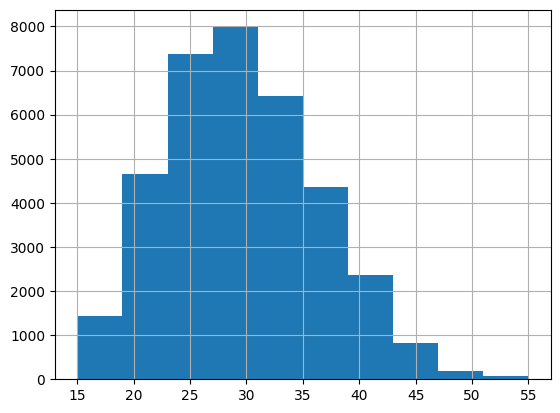

In [36]:
df_maes['idade_ultimo_parto'].hist()

<Axes: >

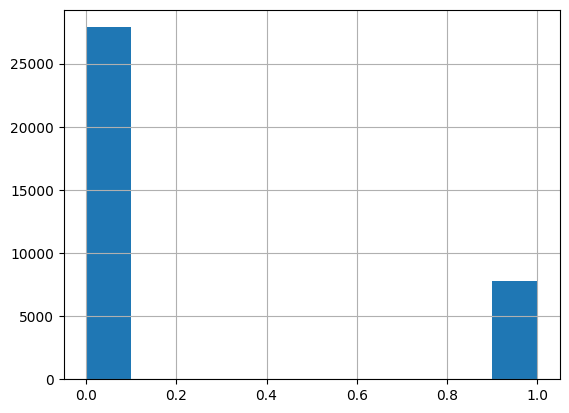

In [37]:
df_maes['parto_idade_avançada'].hist()

<Axes: >

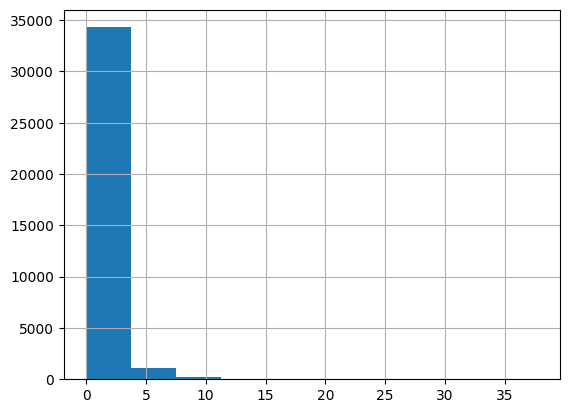

In [38]:
df_maes['peso_morador_selec'].hist()

In [39]:
df_maes.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 35696 entries, 0 to 35868
Data columns (total 218 columns):
 #    Column                           Non-Null Count  Dtype   
---   ------                           --------------  -----   
 0    V0001                            35696 non-null  int64   
 1    V0024                            35696 non-null  int64   
 2    UPA_PNS                          35696 non-null  int64   
 3    V0006_PNS                        35696 non-null  int64   
 4    V0015                            35696 non-null  int64   
 5    V0022                            35696 non-null  float64 
 6    V0026                            35696 non-null  int64   
 7    V0031                            35696 non-null  int64   
 8    V0025A                           35696 non-null  float64 
 9    V0025B                           2606 non-null   float64 
 10   C001                             35696 non-null  float64 
 11   C00301                           35696 non-null  float64 

In [40]:
dicionario_1 = {
    "V0001": "Unidade da Federação",
    "V0026": "Tipo de situação censitária",
    "C001": "Quantidade de pessoas no domicílio",
    "C006": "Sexo",
    "C00701": "Dia de nascimento",
    "C00702": "Mês de nascimento",
    "C00703": "Ano de nascimento",
    "C008": "Idade do morador na data de referência",
    "D00201": "Frequenta escola ou creche",
    "D00901": "Qual foi o curso mais elevado que ___frequentou",
    "G046": "___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?",
    "G049": "____________ faz uso de aparelho auditivo",
    "G051": "____________ faz uso de implante coclear?",
    "G053": "____________ faz uso de sistema de frequência modulada individual (sistema FM)?",
    "G059": "___ usa algum aparelho de auxílio para se locomover?",
    "G060": "____________ faz uso de cadeira de rodas?",
    "G062": "____________ faz uso de bengala, muletas ou andador?",
    "G064": "____________ faz uso de prótese?",
    "G066": "____________ faz uso de órtese?",
    "G070": "___ tem dificuldade permanente de caminhar ou subir degraus?",
    "G072": "___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?",
    "G073": "____________ faz uso de prótese para os membros superiores?",
    "G079": "___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos?",
    "G083": "Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais.",
    "G084": "Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular?",
    "L021": "Foi realizado o teste do pezinho?",
    "L033": "O teste do coraçãozinho realizado deu resultado alterado?",
    "L037": "Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)",
    "L038": "Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)",
    "L039": "Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)",
    "L040": "Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).",
    "L01701": "Leite materno?",
    "L018": "Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?",
    "L019": "Alguma vez ___________ recebeu Sulfato Ferroso?",
    "P00103": "Peso - Informado (em kg) (3 inteiros e 1 casa decimal)",
    "P00104": "Peso - Final (em kg) (3 inteiros e 1 casa decimal)",
    "P00403": "Altura - Informada (em cm) (3 inteiros)",
    "P00404": "Altura - Final (em cm) (3 inteiros)",
    "Q00201": "Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?",
    "Q00202": "Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?",
    "Q003": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?",
    "Q028": "Em geral, em que grau a hipertensão limita as suas atividades habituais?",
    "Q03001": "Algum médico já lhe deu o diagnóstico de diabetes?",
    "Q03002": "Esse diabetes ocorreu apenas durante algum período de gravidez?",
    "Q031": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?",
}

dicionario_2 = {
    "Q055011": "Problemas na vista",
    "Q055012": "Infarto ou AVC (Acidente Vascular cerebral) / derrame ou outro problema circulatório",
    "Q055013": "Problema nos rins",
    "Q060": "Algum médico já lhe deu o diagnóstico de colesterol alto?",
    "Q061": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?",
    "Q06307": "Infarto",
    "Q06308": "Angina",
    "Q06309": "Insuficiência cardíaca",
    "Q06310": "Arritmia",
    "Q064": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?",
    "Q068": "Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?",
    "Q070": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?",
    "Q074": "Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?",
    "Q075": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?",
    "Q079": "Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?",
    "Q080": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?",
    "Q084": "O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço?",
    "Q085": "Que idade o(a) Sr(a) tinha quando começou o problema na coluna?",
    "Q087": "Em geral, em que grau o problema na coluna limita as suas atividades habituais?",
    "Q088": "Algum médico já lhe deu o diagnóstico de DORT?",
    "Q08901": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?",
    "Q091": "Em geral, em que grau o DORT limita as suas atividades habituais?",
    "Q092": "Algum médico ou profissional de saúde mental já lhe deu o diagnóstico de depressão?",
    "Q09301": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?",
    "Q109": "Em geral, em que grau a depressão limita as suas atividades habituais?",
    "Q11007": "Diagnóstico de Esquizofrenia",
    "Q11008": "Diagnóstico de Transtorno bipolar",
    "Q11009": "Diagnóstico de TOC (Transtorno obsessivo compulsivo)",
    "Q111": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?",
    "Q11604": "Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão?",
    "Q11605": "Diagnóstico de enfisema pulmonar",
    "Q11606": "Diagnóstico de bronquite crônica",
    "Q11701": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?",
    "Q120": "Algum médico já lhe deu diagnóstico de câncer?",
    "Q12201": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?",
    "Q124": "Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?",
    "Q125": "Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?",
    "R025": "Com que idade a sra ficou menstruada pela primeira vez?",
    "R026": "A sra ainda fica menstruada?",
    "R027": "Com que idade a sra parou de menstruar?",
    "R028": "A sra já entrou na menopausa?",
    "R029": "Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa?",
    "R034": "A sra usa algum método para evitar a gravidez atualmente?",
    "R035": "Qual o principal motivo de não evitar a gravidez?",
    "R03601": "Pilula?",
    "R037": "A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?",
    "R038": "Há quanto tempo a sra está tentando engravidar?",
    "S065": "Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?",
    "S066": "Quantos partos a Sra já teve?",
    "S06701": "Em que data foi o último parto?",
    "S068": "Quando estava grávida fez alguma consulta de pré-natal?",
    "S070": "Quantas consultas de pré-natal fez durante esta gravidez?",
    "S082": "Qual foi o resultado do teste/exame para sífilis?",
    "S083": "Recebeu tratamento para sífilis?",
    "S086": "Qual foi o resultado do teste/exame para sífilis do seu parceiro?",
    "S087": "O seu parceiro foi tratado?",
    "S095": "Durante o pré-natal a Sra foi orientada a usar preservativo?",
    "S096": "Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?",
    "S098": "Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano?",
    "S099": "Quantas doses dessa injeção tomou durante esta gravidez?",
    "S110": "Qual foi o peso dele(a) ao nascer?",
    "S112": "Onde foi realizado o parto?",
    "S115": "Qual foi o tipo de parto?",
    "S116": "Nesta gravidez, entrou em trabalho de parto?",
    "S117": "Qual o principal motivo de ter tido parto cesáreo?",
    "S125": "Teve alguma complicação durante o parto?",
    "S127": "Por causa dessa complicação precisou ser internada?",
    "W001": "Antropometria aferida do morador selecionado",
    "W00203": "Altura - Final (em cm)(3 inteiros e 1 casa decimal)",
    "VDL001": "Idade em meses das crianças nascidas no período de referência do Módulo L",
}

dicionarios = dicionario_1 | dicionario_2

In [41]:
for col in df_maes.columns:
  if col in dicionarios:  # Verificar se `col` está no dicionário
        print(f"Chave: {col}, Valor: {dicionarios[col]}")
  print(df_maes[col].value_counts(dropna=False))
  print('\n\n')

Chave: V0001, Valor: Unidade da Federação
V0001
35    2381
21    2043
31    2023
33    1970
23    1768
26    1646
41    1616
15    1574
29    1448
43    1422
42    1401
32    1389
25    1267
50    1219
27    1213
13    1180
24    1150
52    1072
22    1072
28    1065
51     963
14     890
11     869
53     861
12     832
17     725
16     637
Name: count, dtype: int64



V0024
1210010    436
1410011    343
5010011    317
2410011    314
3220012    293
          ... 
3522020      5
3510120      5
4220020      5
4230020      4
3322020      4
Name: count, Length: 574, dtype: int64



UPA_PNS
140004555    13
110002724    13
170005701    13
270014262    12
520114340    12
             ..
170007052     1
510068035     1
170023289     1
330112729     1
330127441     1
Name: count, Length: 7883, dtype: int64



V0006_PNS
12    2696
5     2693
3     2682
4     2677
10    2667
11    2664
8     2652
7     2650
2     2646
6     2632
1     2609
9     2568
15    1173
14    1168
13    1157
16     122


In [42]:
df_maes.to_csv('data/df_maes_v3.csv', index=False)

In [43]:
df_maes['raca'].value_counts(dropna=False)

raca
Parda       18529
Branca      12660
Preta        3965
Indígena      291
Amarela       251
Name: count, dtype: int64